# SARIMA

## Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go

In [13]:
# Carregar os dados
df = pd.read_csv("../data/commerce_dataset.csv", sep=";")

## SARIMA

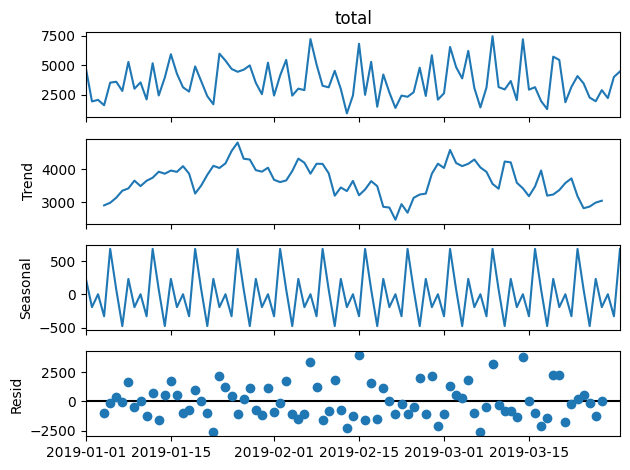

ADF Statistic: -7.654895726803345
p-value: 1.7495640309589474e-11


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Converter 'dtme' para datetime e agrupar por esta coluna para obter o total de vendas por dia
df['dtme'] = pd.to_datetime(df['dtme'])
daily_sales = df.set_index('dtme')['total'].resample('D').sum()

# Decompor a série temporal para analisar tendência e sazonalidade
decomposition = seasonal_decompose(daily_sales)

# Plotar a decomposição
decomposition.plot()
plt.show()

# Verificar novamente a estacionariedade após a agregação diária
adf_result = adfuller(daily_sales.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


/Users/kiwi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                             total   No. Observations:                   89
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -721.238
Date:                           Mon, 26 Feb 2024   AIC                           1452.476
Time:                                   15:43:51   BIC                           1464.448
Sample:                               01-01-2019   HQIC                          1457.280
                                    - 03-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0400      0.130     -0.309      0.757      -0.294       0.214
ma.L1         -0.9192      0.080    -11.447

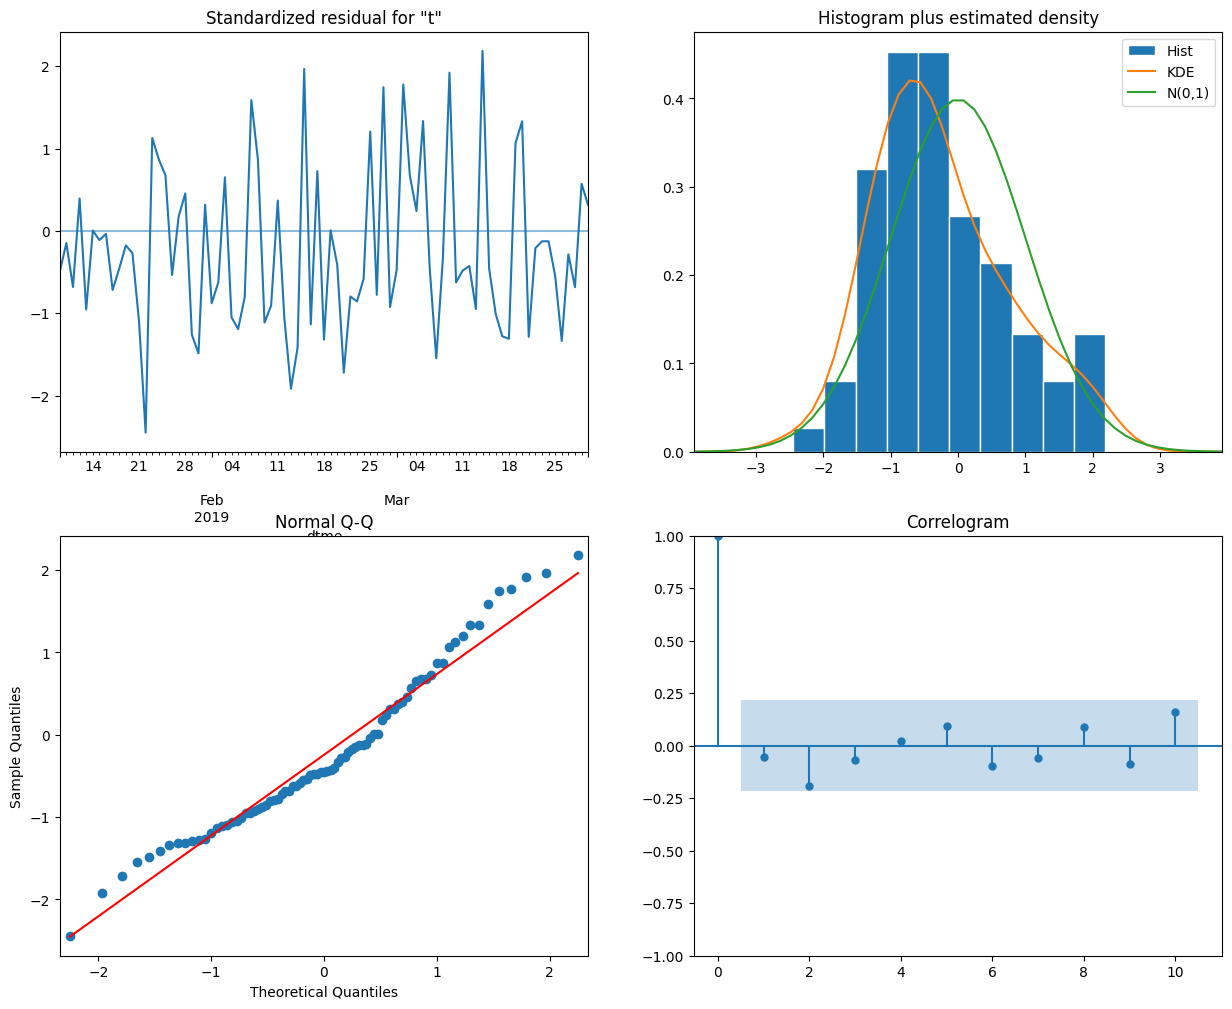

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definir parâmetros iniciais para o modelo SARIMA
p, d, q = 1, 1, 1  # Parte não sazonal
P, D, Q, m = 1, 1, 1, 7  # Parte sazonal

# Construir e treinar o modelo SARIMA
model_sarima = SARIMAX(daily_sales, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_sarima_fit = model_sarima.fit(disp=False)

# Exibir o resumo do modelo
print(model_sarima_fit.summary())

# Plotar o diagnóstico do modelo
model_sarima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


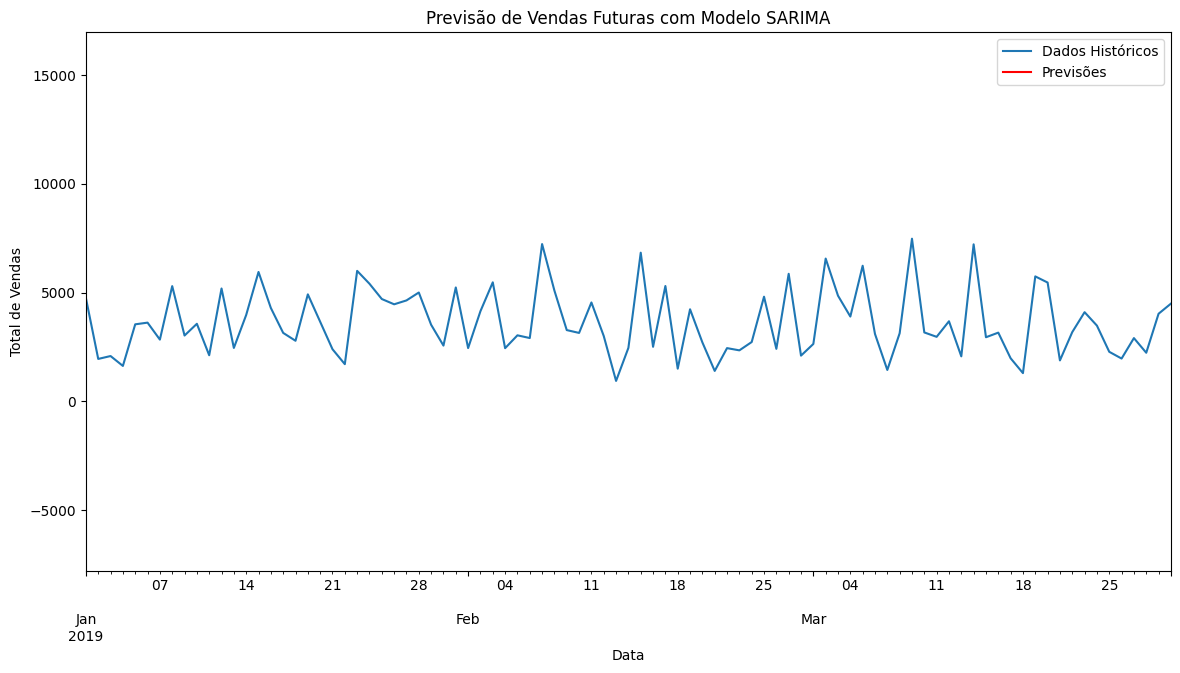

In [16]:
# Definir o período de previsão
n_periods = 30

# Realizar previsões
forecast = model_sarima_fit.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Corrigir o plot das previsões com os dados históricos
plt.figure(figsize=(14, 7))
daily_sales.plot(label='Dados Históricos')
plt.plot(forecast_index, forecast_mean, color='red', label='Previsões')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Previsão de Vendas Futuras com Modelo SARIMA')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend()
plt.show()
